# Preamble

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dask.array
import cartopy.crs as ccrs
import pickle
import matplotlib.colors as colors
import datetime as dt
import pickle
from matplotlib.colors import BoundaryNorm
import glob
import pdb
import matplotlib.gridspec as gridspec
import warnings
warnings.filterwarnings('ignore')

import calendar
import sys
sys.path.append('/home/563/ab2313/MJO/functions')
import access_functions as af
import subphase_calc_functions as subphase_calc
import access_plot_functions as apf

from importlib import reload

In [4]:
savedir = 'Plots/Rain Comparisons/maps/'

# Proccessing

## Reading in files

In [5]:
# This is the observed rmm
subphase_calc = reload(subphase_calc)
rmm_obs = subphase_calc.load_rmm()
rmm_obs

<xarray.Dataset>
Dimensions:    (time: 8340)
Coordinates:
  * time       (time) datetime64[ns] 1974-10-01 1974-10-02 ... 2020-02-16
Data variables:
    RMM1       (time) float64 0.5789 0.7589 0.8966 0.6736 ... 0.8362 1.284 1.449
    RMM2       (time) float64 -0.9097 -0.9504 -0.5804 ... 1.249 1.232 1.134
    phase      (time) float64 3.0 3.0 4.0 4.0 4.0 5.0 ... 6.0 6.0 6.0 5.0 5.0
    amplitude  (time) float64 1.078 1.216 1.068 0.7765 ... 1.235 1.503 1.78 1.84
Attributes:
    Months:   Values are only for the wet-season [10,11,12,1,2,3]

In [6]:
af = reload(af)
rmm_access = af.load_rmm_access()
rmm_access

<xarray.Dataset>
Dimensions:    (ensemble: 11, time: 4192)
Coordinates:
  * ensemble   (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11
  * time       (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    phase      (ensemble, time) float32 3.0 3.0 3.0 3.0 3.0 ... 7.0 7.0 7.0 7.0
    amplitude  (ensemble, time) float32 1.9151419 1.9850118 ... 1.3954009
Attributes:
    Info:     this is the 3rd version with atan2(rmm2, rmm2) (with no + 180)

In [7]:
af = reload(af)
awap = af.load_awap()

In [8]:
awap

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 19278)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1911-01-01 1911-01-02 ... 2017-12-31
Data variables:
    precip   (time, lat, lon) float32 nan 2.7694564 4.730564 ... nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

In [9]:
# # This version of AWAP is just for the north, wet-season and for raindays
# awap_dir = '/g/data/w40/ab2313/awap_n2.nc'
# awap = xr.open_dataset(awap_dir)
# awap

In [10]:
af = reload(af)
access_directory = '/g/data/w40/ab2313/ACCESS_S_1ST_1M_ensembles/'
access = af.load_access(access_directory)

In [11]:
access

<xarray.Dataset>
Dimensions:   (ensemble: 11, lat: 49, lon: 149, time: 8362)
Coordinates:
  * lon       (lon) float32 113.75 114.0 114.25 114.5 ... 150.25 150.5 150.75
  * lat       (lat) float32 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip    (ensemble, time, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    Time:         Only for the wet-season

<font size = "+1" color = 'green'> Matching the Time Length of Both Datasets </font>

In [12]:
'''First, both of the files must be of the same length'''

# Matching the two
awap = awap.where(awap.time.isin(access.time.values), drop = True)

access = access.where(access.time.isin(awap.time.values), drop = True)

In [13]:
rmm_access = rmm_access.where(rmm_access.time.isin(access.time.values), drop = True)
rmm_obs = rmm_obs.where(rmm_obs.time.isin(access.time.values), drop = True)

In [14]:
len(rmm_obs.time.values), len(rmm_access.time.values)

(4159, 4159)

In [15]:
len(access.time.values), len(awap.time.values)

(4159, 4159)

In [16]:
access

<xarray.Dataset>
Dimensions:   (ensemble: 11, lat: 49, lon: 149, time: 4159)
Coordinates:
  * lon       (lon) float32 113.75 114.0 114.25 114.5 ... 150.25 150.5 150.75
  * lat       (lat) float32 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time      (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * ensemble  (ensemble) int64 1 2 3 4 5 6 7 8 9 10 11
Data variables:
    precip    (ensemble, time, lat, lon) float32 nan nan nan nan ... nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...
    Time:         Only for the wet-season

In [17]:
awap

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, time: 4159)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
Data variables:
    precip   (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

# Calculation

Splitting the data into the different phases of the MJO

## Splitting

<div class="alert alert-block alert-info"> <font color = 'black'> Splitting AWAP </font></div>

In [18]:
subphase_calc = reload(subphase_calc)
# Split AWAP into the subphases: enhanced, suppressed, transition and inactive.
awap_split = subphase_calc.split_into_subphase(awap, rmm_obs)

In [19]:
awap_split

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, phase: 4, time: 4159)
Coordinates:
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * time     (time) datetime64[ns] 1990-01-01 1990-01-02 ... 2012-12-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

<div class="alert alert-block alert-info"> <font color = 'black'> Splitting ACCESS </font></div>

In [20]:
af = reload(af)
access_split = af.access_rmm_split(access,rmm_access)

1 2 3 4 5 6 7 8 9 10 11 

MemoryError: Unable to allocate array with shape (11, 4, 4159, 49, 149) and data type float32

In [ ]:
access_split

##  Finding Extremes

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5"> AWAP </font></center></div>


In [20]:
awap_extreme_90 = subphase_calc.unsplit_find_events_above_q(awap, 90)

In [21]:
subphase_calc = reload(subphase_calc)
# Split AWAP into the subphases: enhanced, suppressed, transition and inactive.
awap_split_extreme_90 = subphase_calc.split_into_subphase(awap_extreme_90, rmm_obs)

In [22]:
awap_split_extreme_90

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, phase: 4, time: 3386)
Coordinates:
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * time     (time) datetime64[ns] 1990-01-02 1990-01-04 ... 2012-12-31
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (phase, time, lat, lon) float32 nan nan nan nan ... nan nan nan nan
Attributes:
    Information:  Only contains the wet season [10,11,12,1,2,3],rainfall >= 1...

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5"> ACCESS </font></center></div>


In [23]:
af = reload(af)
access_extreme_90 = af.return_access_extremes(access, 90)

In [24]:
access_split_extreme_90 = af.access_rmm_split(access_extreme_90,rmm_access)

1 2 3 4 5 6 7 8 9 10 11 

# Calculating Count

## Count

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5"> Extremes </font></center></div>


In [25]:
access_extreme_count = access_split_extreme_90.groupby('time.month').count(dim = 'time').mean(dim = 'ensemble')

awap_extreme_count = awap_split_extreme_90.groupby('time.month').count(dim = 'time')

In [26]:
extreme_test = access_split_extreme_90.groupby('time.month').count(dim = 'time')

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5"> All events </font></center></div>


In [ ]:
import phase_calc_functions as phase_calc
test = phase_calc()

In [27]:
access_count_single = access_split.sel(ensemble = 1).groupby('time.month').count(dim = 'time')

In [28]:
access_count = access_split.groupby('time.month').count(dim = 'time').mean(dim = 'ensemble')

awap_count = awap_split.groupby('time.month').count(dim = 'time')

In [29]:
access_count, awap_count

(<xarray.Dataset>
 Dimensions:  (lat: 49, lon: 149, month: 6, phase: 4)
 Coordinates:
   * lon      (lon) float32 113.75 114.0 114.25 114.5 ... 150.25 150.5 150.75
   * lat      (lat) float32 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
   * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
   * month    (month) int64 1 2 3 10 11 12
 Data variables:
     precip   (month, phase, lat, lon) float64 0.0 17.36 20.55 ... 0.0 0.0 0.0,
 <xarray.Dataset>
 Dimensions:  (lat: 49, lon: 149, month: 6, phase: 4)
 Coordinates:
   * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
   * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
   * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
   * month    (month) int64 1 2 3 10 11 12
 Data variables:
     precip   (month, phase, lat, lon) int64 0 39 43 48 48 48 47 ... 0 0 0 0 0 0)

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5"> Normalising </font></center></div>


In [30]:
subphase_calc = reload(subphase_calc)
rmm_count_month = subphase_calc.count_in_rmm_subphase_monthly(rmm_obs)

awap_count_norm  = (awap_count.precip * 100/rmm_count_month.number).to_dataset(name = 'precip')

awap_count_norm

<xarray.Dataset>
Dimensions:  (lat: 49, lon: 149, month: 6, phase: 4)
Coordinates:
  * month    (month) int64 1 2 3 10 11 12
  * lon      (lon) float64 113.8 114.0 114.2 114.5 ... 150.0 150.2 150.5 150.8
  * lat      (lat) float64 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase    (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip   (month, phase, lat, lon) float64 0.0 19.12 21.08 ... 0.0 0.0 0.0

In [31]:
subphase_calc = reload(subphase_calc)


rmm_access_count_month_single = subphase_calc.count_in_rmm_subphase_monthly(rmm_access.sel(ensemble = 1))

access_count_single_norm = (access_count_single.precip * 100 /rmm_access_count_month_single.number).to_dataset(name = 'precip')

In [32]:
access_count_single_norm

<xarray.Dataset>
Dimensions:   (lat: 49, lon: 149, month: 6, phase: 4)
Coordinates:
  * month     (month) int64 1 2 3 10 11 12
    ensemble  int64 1
  * lon       (lon) float32 113.75 114.0 114.25 114.5 ... 150.25 150.5 150.75
  * lat       (lat) float32 -23.0 -22.75 -22.5 -22.25 ... -11.5 -11.25 -11.0
  * phase     (phase) object 'enhanced' 'suppressed' 'transition' 'inactive'
Data variables:
    precip    (month, phase, lat, lon) float64 0.0 7.222 8.889 ... 0.0 0.0 0.0

In [33]:
subphase_calc = reload(subphase_calc)

ensemble_stor = []

for ensemble in rmm_access.ensemble.values:
    rmm_single = rmm_access.sel(ensemble = ensemble)
    rmm_single_count =  subphase_calc.count_in_rmm_subphase_monthly(rmm_single)
    
    ensemble_stor.append(rmm_single_count)
    
rmm_access_count_month = xr.concat(ensemble_stor, dim = 'ensemble').mean(dim = 'ensemble')

In [34]:
access_count_norm = (access_count.precip * 100/rmm_access_count_month.number).to_dataset(name = 'precip')

# Plotting

## Raw Plots

<div class="alert alert-block alert-info"> <center> <font color = 'black' size = "+1.5"> Plotting </font></center></div>


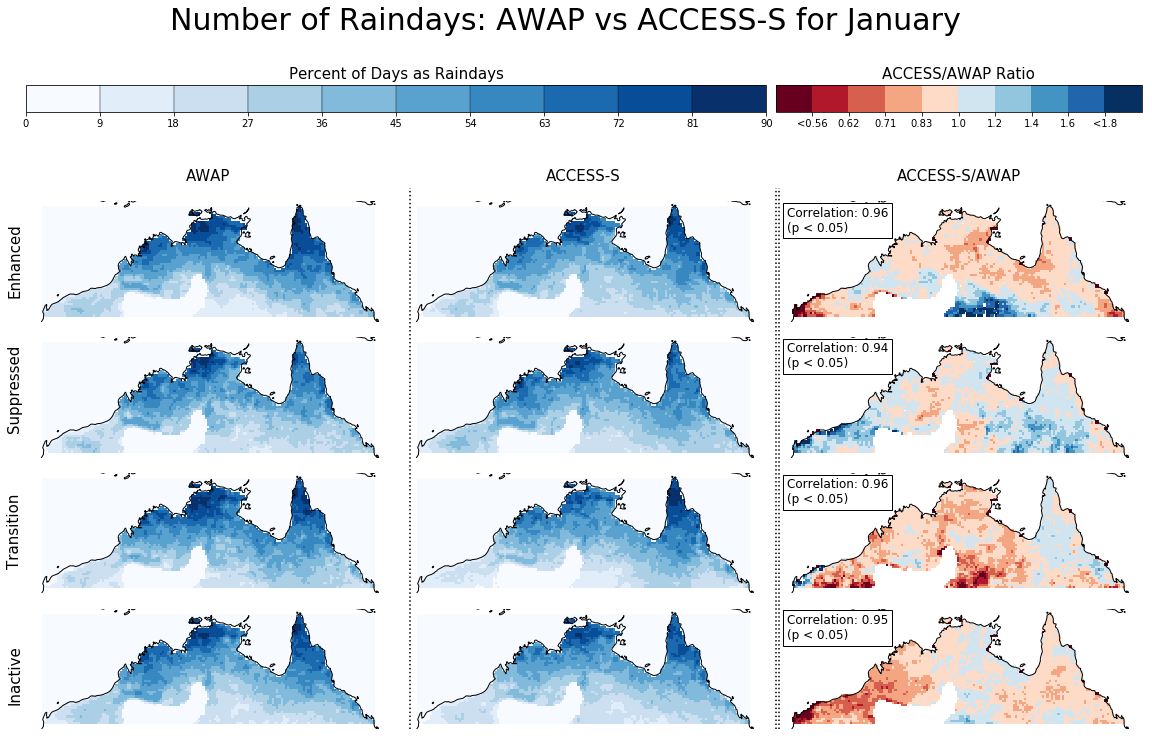

In [37]:
apf = reload(apf) 
apf.comparison_plot(awap_count_norm, access_count_single_norm, month = 1, plot_max = 90,  vmax = 2,
                    rain_type = 'Number of Raindays',
                   cbar1_title = 'Percent of Days as Raindays', cbar2_title = 'ACCESS/AWAP Ratio',
                    savedir = savedir, savefig = 0
                  )

In [63]:
apf = reload(apf) 
rain_type = 'Number of Raindays'

for month in [10,11,12,1,2,3]:

    apf.comparison_plot(awap_count_norm, access_count_single_norm, month = month, plot_max = 90,  vmax = 2,
                    rain_type = 'Number of Raindays',
                   cbar1_title = 'Percent of Days as Raindays', cbar2_title = 'ACCESS/AWAP Ratio',
                    savedir = savedir, savefig = 0, dont_plot = 1)

Number of Raindays: AWAP vs ACCESS-S for October has been saved
Number of Raindays: AWAP vs ACCESS-S for November has been saved
Number of Raindays: AWAP vs ACCESS-S for December has been saved
Number of Raindays: AWAP vs ACCESS-S for January has been saved
Number of Raindays: AWAP vs ACCESS-S for February has been saved
Number of Raindays: AWAP vs ACCESS-S for March has been saved


# Pattern Correlation Timeseries

In [38]:
af = reload(af)
pattern_correlation = af.month_pattern_correlations(awap_count_norm, access_count_single_norm)

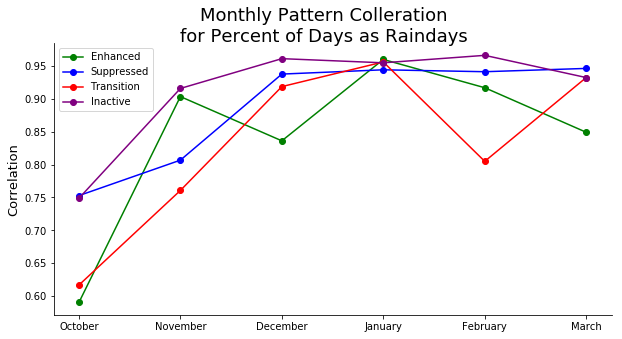

In [39]:
apf = reload(apf)

title = 'Monthly Pattern Colleration\nfor Percent of Days as Raindays'

apf.timeseries_pattern_correlation_plot(pattern_correlation,title = title, custom  = 0, savefig = 0)